In [5]:
# Import Libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta
from copy import deepcopy
import math

In [6]:

with open('../stock_scraper/companies_data/AB.json') as f:
    data = json.load(f)

amen_bank = pd.json_normalize(data, 'QuoteTab', ['Name'])

# Rename the columns
amen_bank.rename(columns={
    'Name': 'companyName',
    'd': 'date',
    'o': 'openingPrice',
    'h': 'highestPrice',
    'l': 'lowestPrice',
    'c': 'closingPrice',
    'v': 'volume'
}, inplace=True)
amen_bank

,date,openingPrice,highestPrice,lowestPrice,closingPrice,volume,companyName
0,09/06/2014,23.63,23.63,22.75,23.14,1608,AMEN BANK
1,16/06/2014,23.63,23.63,22.75,23.14,1608,AMEN BANK
2,23/06/2014,23.14,23.14,22.37,22.75,16837,AMEN BANK
3,30/06/2014,22.75,22.97,22.07,22.66,33514,AMEN BANK
4,07/07/2014,22.75,23.17,21.88,22.74,3340,AMEN BANK
...,...,...,...,...,...,...,...
518,13/05/2024,40.00,41.12,39.50,39.99,99239,AMEN BANK
519,20/05/2024,39.99,41.12,39.99,40.90,44343,AMEN BANK
520,27/05/2024,40.95,41.50,40.42,41.18,46829,AMEN BANK
521,03/06/2024,41.18,42.00,41.00,42.00,24726,AMEN BANK


In [7]:
print(amen_bank.shape)


(523, 7)


In [8]:
amen_bank=amen_bank.reset_index()['closingPrice']
amen_bank

0      23.14
1      23.14
2      22.75
3      22.66
4      22.74
       ...  
518    39.99
519    40.90
520    41.18
521    42.00
522    44.97
Name: closingPrice, Length: 523, dtype: float64

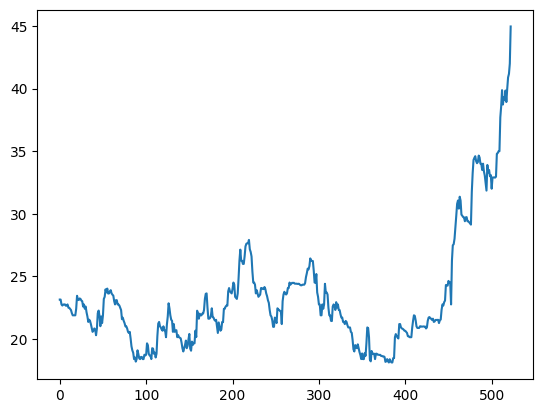

In [9]:
plt.plot(amen_bank)

In [10]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(np.array(amen_bank).reshape(-1,1))
scaled_data

array([[0.18726731],
       [0.18726731],
       [0.17274758],
       [0.16939687],
       [0.17237528],
       [0.17274758],
       [0.17274758],
       [0.16902457],
       [0.16902457],
       [0.17274758],
       [0.16306776],
       [0.16269546],
       [0.15934475],
       [0.15599404],
       [0.14668652],
       [0.14035741],
       [0.14035741],
       [0.14035741],
       [0.14035741],
       [0.15971705],
       [0.19843634],
       [0.18726731],
       [0.18577811],
       [0.19061802],
       [0.18912882],
       [0.18428891],
       [0.1824274 ],
       [0.16641847],
       [0.17274758],
       [0.15971705],
       [0.16641847],
       [0.14929263],
       [0.1370067 ],
       [0.12062547],
       [0.12732688],
       [0.12397617],
       [0.11429635],
       [0.10275503],
       [0.0912137 ],
       [0.09456441],
       [0.10126582],
       [0.09791512],
       [0.08116158],
       [0.10126582],
       [0.14668652],
       [0.15450484],
       [0.1377513 ],
       [0.107

In [11]:
##splitting dataset into train and test split
training_size=int(len(scaled_data)*0.65)
test_size=len(scaled_data)-training_size
train_data,test_data=scaled_data[0:training_size,:],scaled_data[training_size:len(scaled_data),:1]

In [12]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [13]:

time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [14]:
print(X_train.shape), print(y_train.shape)

(328, 10)
(328,)


(None, None)

In [15]:
print(X_test.shape), print(y_test.shape)

(173, 10)
(173,)


(None, None)

In [16]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [17]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/home/firas/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100


6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - loss: 0.0252 - val_loss: 0.0471
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0049 - val_loss: 0.0263
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0040 - val_loss: 0.0436
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0040 - val_loss: 0.0340
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028 - val_loss: 0.0181
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027 - val_loss: 0.0184
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023 - val_loss: 0.0126
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0018 - val_loss: 0.0066
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0019 - val_loss: 0.0070
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0017 - val_loss: 0.0045
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0018 - val_loss: 0.0070
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0020 - val_loss: 0.0060


In [20]:
### Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [21]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [22]:
math.sqrt(mean_squared_error(y_train,train_predict))

22.17780372604349

In [23]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

24.980699875291382

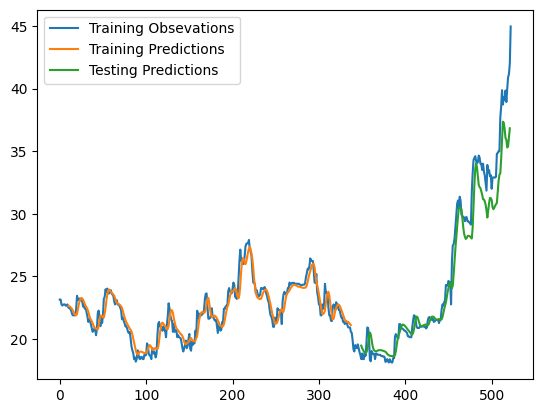

In [24]:
### Plotting 
#  train predictions for plotting
look_back=10
trainPredictPlot = np.empty_like(scaled_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# test predictions for plotting
testPredictPlot = np.empty_like(scaled_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(scaled_data)-1, :] = test_predict

plt.plot(scaler.inverse_transform(scaled_data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Training Obsevations', 
                    'Training Predictions',
                    'Testing Predictions', 
                    ])
plt.show()

In [25]:
len(test_data)

184

In [26]:
x_input=test_data[84:].reshape(1,-1)
x_input.shape

(1, 100)

In [27]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [28]:
temp_input

[0.10685033507073716,
 0.10126582278481,
 0.10424422933730448,
 0.1239761727475801,
 0.13365599404318684,
 0.13514519731943397,
 0.1314221891288161,
 0.13030528667163066,
 0.12658227848101267,
 0.13030528667163066,
 0.12062546537602381,
 0.12211466865227105,
 0.12658227848101267,
 0.12658227848101267,
 0.12658227848101267,
 0.12695457930007437,
 0.11727475800446763,
 0.12546537602382724,
 0.127699180938198,
 0.15636634400595673,
 0.17274758004467605,
 0.16939687267311987,
 0.17944899478778853,
 0.18428890543559184,
 0.23045420699925534,
 0.2293373045420699,
 0.2285927029039464,
 0.24274013402829475,
 0.23790022338049144,
 0.23790022338049144,
 0.17274758004467605,
 0.3030528667163067,
 0.3488458674609083,
 0.35182427401340277,
 0.368205510052122,
 0.40096798212956064,
 0.43633655994043186,
 0.47207743857036477,
 0.4821295606850333,
 0.4579300074460164,
 0.4932985852568874,
 0.4817572598659716,
 0.44005956813104974,
 0.43670886075949356,
 0.43261355174981375,
 0.43186895011169013,
 0.42

In [29]:
# demonstrate prediction for next 10 days

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
    
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
    
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.87579477]
101
1 day input [0.10126582 0.10424423 0.12397617 0.13365599 0.1351452  0.13142219
 0.13030529 0.12658228 0.13030529 0.12062547 0.12211467 0.12658228
 0.12658228 0.12658228 0.12695458 0.11727476 0.12546538 0.12769918
 0.15636634 0.17274758 0.16939687 0.17944899 0.18428891 0.23045421
 0.2293373  0.2285927  0.24274013 0.23790022 0.23790022 0.17274758
 0.30305287 0.34884587 0.35182427 0.36820551 0.40096798 0.43633656
 0.47207744 0.48212956 0.45793001 0.49329859 0.48175726 0.44005957
 0.43670886 0.43261355 0.43186895 0.42032762 0.43186895 0.43261355
 0.42032762 0.41995532 0.41697692 0.41399851 0.4102755  0.50819062
 0.56366344 0.60275503 0.60908414 0.61392405 0.59940432 0.5930752
 0.59642591 0.61578555 0.61020104 0.591586   0.5912137  0.57297096
 0.591586   0.56924795 0.55658972 0.53536858 0.51154133 0.58786299
 0.56552494 0.57297096 0.55435592 0.55770663 0.51712584 0.55063291
 0.55063291 0.55063291 0.55026061 0.55286672 0.62137007 0.62323157
 0.62881608 0.62881608 0.7293373  

In [30]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [31]:
len(scaled_data)

523

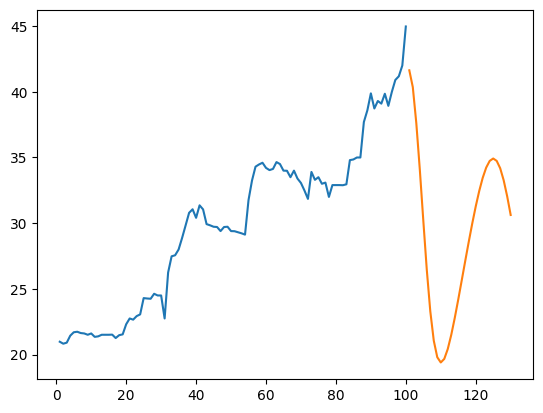

In [32]:
plt.plot(day_new,scaler.inverse_transform(scaled_data[423:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

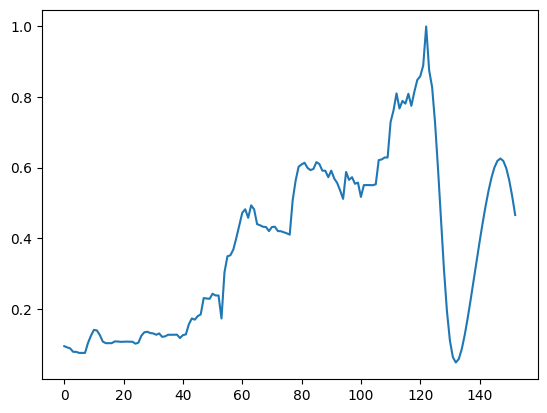

In [33]:
stock_pred=scaled_data.tolist()
stock_pred.extend(lst_output)
plt.plot(stock_pred[400:])

In [34]:
stock_pred=scaler.inverse_transform(stock_pred).tolist()

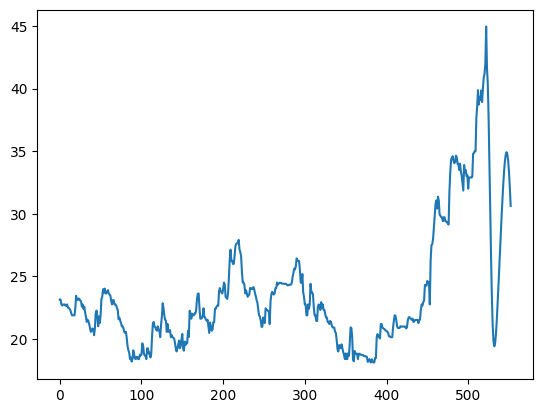

In [35]:
plt.plot(stock_pred)